In [1]:
%matplotlib inline 
# This turns on inline plotting, where plot graphics will appear in notebook.


Training a Classifier
=====================

This is it. You have seen how to define neural networks, compute loss and make
updates to the weights of the network.

Now you might be thinking,

What about data?
----------------

Generally, when you have to deal with image, text, audio or video data,
you can use standard python packages that load data into a numpy array.
Then you can convert this array into a ``torch.*Tensor``.

-  For images, packages such as Pillow, OpenCV are useful
-  For audio, packages such as scipy and librosa
-  For text, either raw Python or Cython based loading, or NLTK and
   SpaCy are useful

Specifically for vision, we have created a package called
``torchvision``, that has data loaders for common datasets such as
Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz.,
``torchvision.datasets`` and ``torch.utils.data.DataLoader``.

This provides a huge convenience and avoids writing boilerplate code.

For this tutorial, we will use the CIFAR10 dataset.
It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

.. figure:: /_static/img/cifar10.png
   :alt: cifar10

   cifar10


Training an image classifier
----------------------------

We will do the following steps in order:

1. Load and normalizing the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolution Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

1. Loading and normalizing CIFAR10
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Using ``torchvision``, it’s extremely easy to load CIFAR10.



In [2]:
from util.devices import find_device
from data_action.transformations import *
from data_action.data_loader import *
from util.image_plot import plot_images
from model.model_cifar import ModelCifar
from learning.train import train
from learning.validate import test

The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



In [3]:
device = find_device()
batch_size = 5

data_loader = Data_Loader(device, batch_size)

trainloader = data_loader.load_training_data()
testloader = data_loader.load_testing_data()

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

device: cuda

Loading training data. Dataset: CIFAR10
Files already downloaded and verified
Training data loaded

Loading testing data.
Files already downloaded and verified
Test data loaded



Let us show some of the training images, for fun.



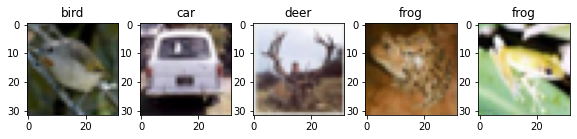

In [4]:

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images and their labels
plot_images(images, classes, labels)


2. Define a Convolution Neural Network
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



In [5]:
net = ModelCifar().to(device)

In [6]:
!pip install torchsummary
from torchsummary import summary

summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 34, 34]             896
              ReLU-2           [-1, 32, 34, 34]               0
       BatchNorm2d-3           [-1, 32, 34, 34]              64
           Dropout-4           [-1, 32, 34, 34]               0
            Conv2d-5           [-1, 64, 36, 36]          18,496
              ReLU-6           [-1, 64, 36, 36]               0
       BatchNorm2d-7           [-1, 64, 36, 36]             128
           Dropout-8           [-1, 64, 36, 36]               0
         MaxPool2d-9           [-1, 64, 18, 18]               0
           Conv2d-10           [-1, 64, 20, 20]             640
             ReLU-11           [-1, 64, 20, 20]               0
      BatchNorm2d-12           [-1, 64, 20, 20]             128
          Dropout-13           [-1, 64, 20, 20]               0
           Conv2d-14           [-1, 64,

3. Define a Loss function and optimizer
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Let's use a Classification Cross-Entropy loss and SGD with momentum.



In [7]:
for epoch in range(10):  # loop over the dataset multiple times
    train(net, device, trainloader, epoch = epoch)
    test(net, device, testloader)


 Epoch = 1 loss=2.0591940879821777 batch_id=9999: 100%|██████████| 10000/10000 [01:54<00:00, 87.61it/s]
\Train set: Accuracy: 25327/50000 (50.6540%)

 Epoch = 2 loss=1.1610581874847412 batch_id=13:   0%|          | 8/10000 [00:00<02:16, 73.12it/s]
Test set: Average loss: 0.9885, Accuracy: 6605/10000 (66.05%)

 Epoch = 2 loss=0.08728063106536865 batch_id=9999: 100%|██████████| 10000/10000 [01:57<00:00, 85.38it/s]
\Train set: Accuracy: 34103/50000 (68.2060%)

 Epoch = 3 loss=0.2647596299648285 batch_id=13:   0%|          | 8/10000 [00:00<02:12, 75.23it/s]
Test set: Average loss: 0.8293, Accuracy: 7135/10000 (71.35%)

 Epoch = 3 loss=0.4371873438358307 batch_id=9999: 100%|██████████| 10000/10000 [01:57<00:00, 85.29it/s]
\Train set: Accuracy: 37064/50000 (74.1280%)

 Epoch = 4 loss=0.8024247884750366 batch_id=12:   0%|          | 8/10000 [00:00<02:17, 72.52it/s]
Test set: Average loss: 0.6823, Accuracy: 7739/10000 (77.39%)

 Epoch = 4 loss=0.3914940357208252 batch_id=9999: 100%|██████████|

5. Test the network on the test data
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.



GroundTruth:    cat  ship  ship plane  frog


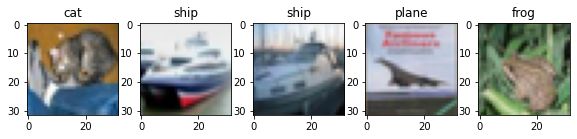

In [8]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
plot_images(images, classes, labels)
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

Okay, now let us see what the neural network thinks these examples above are:



In [9]:
outputs = net(images.to(device))

The outputs are energies for the 10 classes.
Higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [10]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(batch_size)))

Predicted:    cat  ship  ship plane  frog


The results seem pretty good.

Let us look at how the network performs on the whole dataset.



In [11]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 82 %


That looks waaay better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:



In [12]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(batch_size):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 82 %
Accuracy of   car : 89 %
Accuracy of  bird : 80 %
Accuracy of   cat : 65 %
Accuracy of  deer : 83 %
Accuracy of   dog : 75 %
Accuracy of  frog : 86 %
Accuracy of horse : 81 %
Accuracy of  ship : 91 %
Accuracy of truck : 85 %
